# The Double-Slit Experiment

This tutorial will guide you through a digital version of the double-slit experiment.  It expands upon the basic machinery of the First Diffraction Model tutorial to include intermediate planes with free space propagation.  We will also show the far-field.  In this tutorial, you will learn how to:

- Composite multiple geometries to produce an aperture
- use prysm's machinery to compute diffraction patterns at an arbitrary distance
- use prysm's data slicing tools to extract a slice through the x axis

The double slit experiment predicts that the diffraction pattern of a pair of slits has maxima when

$$ y = \frac{m\lambda D}{d} $$

where $D$ is the distance of the screen and $d$ is the slit separation, and $\lambda$ is the wavelength of light.

We'll pick parameters somewhat arbitrarily and say that $a$, the slit diameter, is 20 $\mu m$ and the slit separation is 0.2 mm.

As before, the first step is to build a grid.  Previously we cared about the diameter, but now we want decent sampling across the slits, so we'll control the sample spacing instead.

In [1]:
from prysm.coordinates import make_xy_grid
from prysm.geometry import rectangle

samp_per_slitD = 6
a = .02
d = .2
dx = a / samp_per_slitD

x, y = make_xy_grid(1024, dx=dx)

Since we want two slits separated by $d$, we can produce each one easily by shifting the coordinates by $d/2$ in each direction and making a slit:

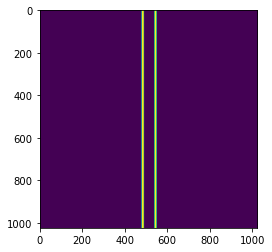

In [2]:
from matplotlib import pyplot as plt

xleft = x - d/2
xright = x + d/2

slit_left = rectangle(width=a, height=10, x=xleft, y=y)
slit_right = rectangle(width=a, height=10, x=xright, y=y)
aperture = slit_left | slit_right

plt.imshow(aperture)

In [3]:
y.max()

1.7033333333333334

As in the first tutorial, we will now package this data into a wavefront.  We can use the Wavefront constructor directly, since we are not trying to combine amplitude and phase information.

In [4]:
from prysm.propagation import Wavefront
from prysm.wavelengths import HeNe

wf = Wavefront(aperture, HeNe, dx)

As a spot check, let's verify the far-field where the separation should be:

$$ s = \frac{\lambda}{d} = \frac{.6328}{200} = 3.164 \text{mrad} $$

prysm always works in spatial units, so we will recall that the relation between pupil and PSF plane samplings is:

$$ x = \frac{f \lambda }{N dx} $$

where $N$ is the number of samples.  So we will just use a dummy variable for f that makes it drop out.  Prysm does a change from mm to $\mu m$ to keep a sense of natural scaling, so the units of the far-field with $f=1$ are mrad.

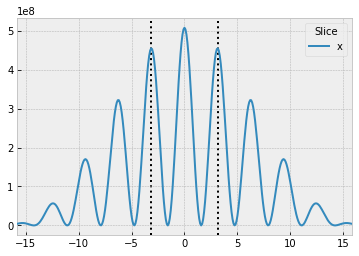

In [5]:
expectation = 3.164
farfield = wf.focus(1) # f=1

plt.style.use('bmh')
fig, ax = farfield.intensity.slices().plot('x', xlim=(expectation*5))
ax.axvline(expectation, ls=':', c='k', zorder=1)
ax.axvline(-expectation, ls=':', c='k', zorder=1)

The first zero in the envelope is where we predict, so our model is working properly.

Now we can look at a screen at a finite distance, which we will choose arbitrarily as 75 mm.  prysm does not do any unit changes here, so our spatial axis has units of mm and we expect maxima at:

$$ y = \frac{m\lambda D}{d} = \frac{m \cdot .6328 \cdot 75}{0.2} $$

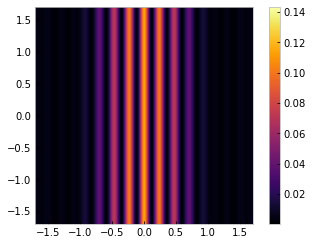

In [6]:
l = .6328e-3
D = 75
maxima = l*D/d
finite_dist = wf.free_space(D)
finite_dist.intensity.plot2d()
plt.grid(False)

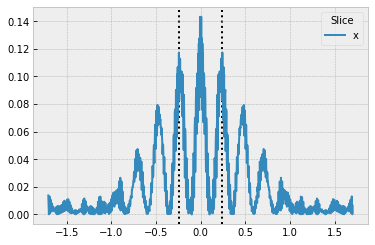

In [7]:
fig, ax = finite_dist.intensity.slices().plot(['x'])
ax.axvline(maxima, ls=':', c='k', zorder=1)
ax.axvline(-maxima, ls=':', c='k', zorder=1)

We can see the maxima of the diffraction pattern properly located.

In summary, we used the tools we already learned about in the first tutorial to set up the basics of the problem.  We then created a double slit aperture by compositing two slits, and learned to use the `free_space` method to perform propagation by a finite distance.